<a href="https://colab.research.google.com/github/justcme/PerformanceSpecs/blob/main/13OriginalBarChart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SETUP

OS

In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive/')
os.chdir("/content/drive/My Drive/Colab Notebooks/LipidPerf/from_Pandas")

Mounted at /content/drive/


Imports

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from operator import index
import pathlib

# DATA

###Average Error by Group

In [ ]:
df = pd.read_csv('Base/df0.csv')

In [ ]:
df0 = df.copy()
df0 = df0.iloc[:,[0,6,13,15,16]]

In [ ]:
LDL = df0.loc[:,'cLDL']
df0.loc[:,'LGp'] = np.select(condlist = [LDL<70, LDL>=190, LDL<160, LDL>=160],
                       choicelist = ['A','D','B','C'],
                       default = np.nan)

In [ ]:
PCE = df0.loc[:,'PCE']
df0.loc[:,'PGp'] = np.select(condlist = [PCE<7.5, PCE>=20, PCE<20],
                             choicelist = ['A','D','Q'],
                             default = np.nan)

In [ ]:
TG = df0.loc[:,'TG']
df0.loc[:,'TGp'] = np.select(condlist = [TG<175, TG>=175],
                             choicelist = ['B','C'],
                             default = np.nan)

In [ ]:
Gp = df0.loc[:,'Lgroup']
LGp = df0.loc[:,'LGp']
PGp = df0.loc[:,'PGp']
TGp = df0.loc[:,'TGp']

for group in ['A','D']:
  df0.loc[:,f'{group}cat'] = np.select(condlist = [(Gp == group) & (LGp == Gp) & (PGp == Gp) & (TGp == Gp),
                                            (Gp == group) & (LGp == Gp) & (PGp == Gp),
                                            (Gp == group) & (LGp == Gp) & (TGp == Gp),
                                            (Gp == group) & (PGp == Gp) & (TGp == Gp),
                                            (Gp == group) & (LGp == Gp),
                                            (Gp == group) & (PGp == Gp),
                                            (Gp == group) & (TGp == Gp)],
                                choicelist = ['LPT', 'LP', 'LT','PT','L', 'P','T'],
                                default = np.nan)

for group in ['B','C']:
  df0.loc[:,f'{group}cat'] = np.select(condlist = [(Gp == group) & (LGp == Gp) & (PGp == 'Q') & (TGp == Gp),
                                            (Gp == group) & (LGp == Gp) & (PGp == 'Q'),
                                            (Gp == group) & (LGp == Gp) & (TGp == Gp),
                                            (Gp == group) & (PGp == 'Q') & (TGp == Gp),
                                            (Gp == group) & (LGp == Gp),
                                            (Gp == group) & (PGp == 'Q'),
                                            (Gp == group) & (TGp == Gp)],
                                choicelist = ['LPT', 'LP', 'LT','PT','L', 'P','T'],
                                default = np.nan)

In [ ]:
df1 = df0.copy()
df1 = df1.iloc[:,[8,10,11,9]]

In [ ]:
df1.head(20)

,Acat,Bcat,Ccat,Dcat
0,LP,nan,nan,nan
1,P,nan,nan,nan
2,nan,nan,nan,P
3,nan,LPT,nan,nan
4,P,nan,nan,nan
5,P,nan,nan,nan
6,nan,nan,LP,nan
7,nan,LPT,nan,nan
8,P,nan,nan,nan
9,P,nan,nan,nan


In [ ]:
d3 = {'A': df1['Acat'].value_counts(), 'B': df1['Bcat'].value_counts(), 'C': df1['Ccat'].value_counts(), 'D':df1['Dcat'].value_counts()}
df3 = pd.DataFrame(d3)
df3

,A,B,C,D
L,138.0,NaN,NaN,108.0
LP,282.0,NaN,211.0,37.0
LPT,NaN,1445.0,82.0,NaN
P,5397.0,NaN,NaN,452.0
PT,NaN,NaN,354.0,NaN
nan,2689.0,7061.0,7859.0,7909.0


In [ ]:
df2 = df3.copy()
df2 = df2.iloc[[0,3,1,4,2],:]
df4 = df2.T
total = df4.sum().sum()

In [ ]:
df5 = df4.div(total, axis=0).mul(100).round(2)
df5

,L,P,LP,PT,LPT
A,1.62,63.45,3.32,NaN,NaN
B,NaN,NaN,NaN,NaN,16.99
C,NaN,NaN,2.48,4.16,0.96
D,1.27,5.31,0.43,NaN,NaN


#Functions

###Create individual stacked bar charts

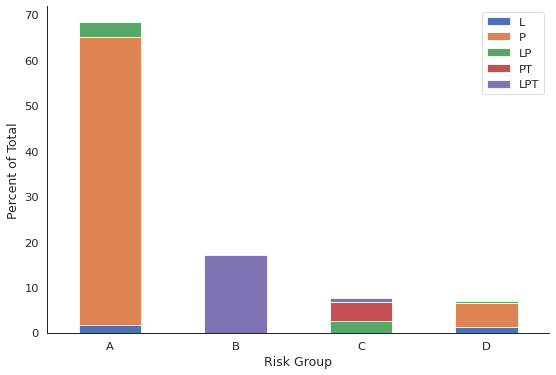

In [ ]:
sns.set_theme(context = 'paper', style = 'white', font_scale = 1.3)
colors = sns.color_palette('deep')
df5.plot(kind = 'bar', stacked = True, color = colors, figsize = (9,6))

plt.xticks(rotation = 0, horizontalalignment = "center")
plt.xlabel('Risk Group')
plt.ylabel('Percent of Total')
#plt.title('Original Risk Classifications', fontdict = {'fontsize': 20}, pad = 20)
#lt.legend(title = 'Deciding Factors', loc = 'best')
sns.despine()
fig = plt.gcf()

In [ ]:
fig.savefig('Figures/OriginalBarchart.jpg', dpi = 600)